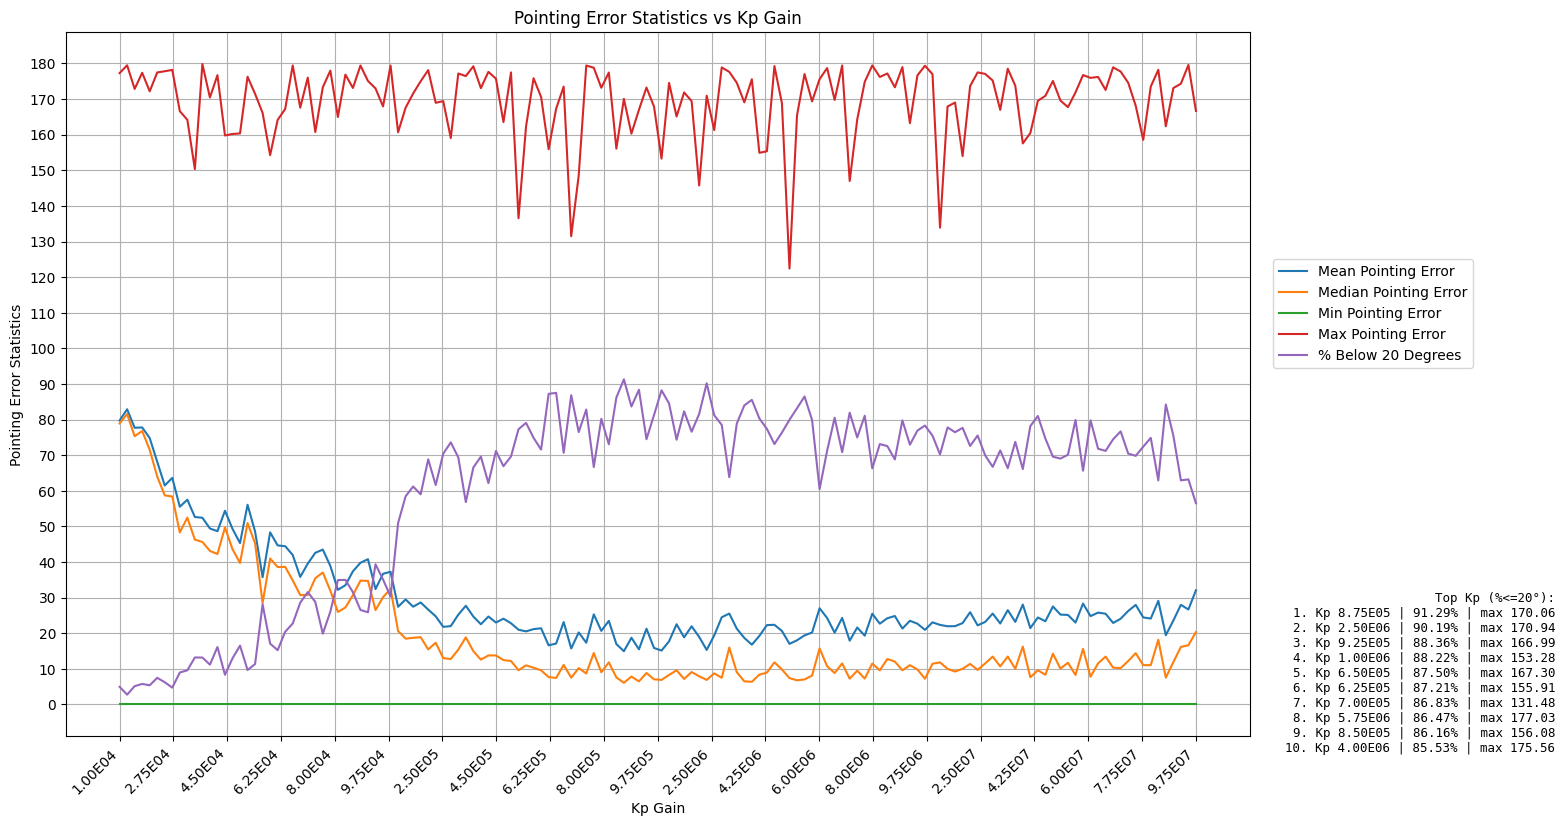

In [19]:
# plot the statistics
import matplotlib.pyplot as plt
import numpy as np
import math

def short_sci(x, decimals=2):
    if x == 0:
        return f"0E00"
    exp = int(math.floor(math.log10(abs(float(x)))))
    mantissa = float(x) / (10 ** exp)
    mantissa_str = f"{mantissa:.{decimals}f}"
    exp_str = f"{exp:02d}" if exp >= 0 else f"{exp:03d}"  # Handles negative exponents if needed
    return f"{mantissa_str}E{exp_str}"

data = np.loadtxt('gain_search_results20251205.txt', skiprows=1)
rng = range(0, len(data))  # change the range as needed
kp_vals_plot = data[rng,0]
mean_vals = data[rng,2]
median_vals = data[rng,3]
min_vals = data[rng,4]
max_vals = data[rng,5]
perc_vals = data[rng,6]

# figure
fig = plt.figure(figsize=(20, 8))
plt.plot(rng, mean_vals, label='Mean Pointing Error')
plt.plot(rng, median_vals, label='Median Pointing Error')
plt.plot(rng, min_vals, label='Min Pointing Error')
plt.plot(rng, max_vals, label='Max Pointing Error')
plt.plot(rng, perc_vals, label='% Below 20 Degrees')
plt.xlabel('Kp Gain')
plt.ylabel('Pointing Error Statistics')
plt.title('Pointing Error Statistics vs Kp Gain')
plt.grid(True)

# put legend outside, on the right
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.6), borderaxespad=0.)

# give extra room on the right for the legend + text
plt.tight_layout(rect=[0, 0, 0.75, 1])

# ticks and labels - use the short_sci function, python cannot handle printing these kinds of numbers in a readible and sensible way
am_xticks = 21
#xticks_rep = np.linspace(np.min(kp_vals_plot), np.max(kp_vals_plot), am_xticks)
xticks = np.linspace(0, len(data)-1, am_xticks)
xlabels = [short_sci(v) for v in kp_vals_plot[xticks.astype(int)]]
yticks = np.linspace(0, 180, 19)
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels, rotation=45, ha='right')
ax.set_yticks(yticks)

# side text: top Kp values
top_n = min(10, len(data))
lines = ["Top Kp (%<=20°):"]
for i in range(top_n):
    idx = np.argsort(-perc_vals)[i]
    lines.append(f"{i+1}. Kp {short_sci(kp_vals_plot[idx])} | {perc_vals[idx]:5.2f}% | max {max_vals[idx]:.2f}")
fig.text(0.78, 0.05, "\n".join(lines), ha='right', va='bottom', fontsize=9, family='monospace')

plt.show()